### Importing the necessary library

In [1]:
import warnings 
import pandas as pd
import seaborn as sns
from scipy.stats import norm as norm
import yfinance as yahoo_f
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ignore Annoying warnings from pandas and numpy
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
fb = yahoo_f.download("FB", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


The description of the data is given below

In [4]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,242.732470,246.559961,238.838088,242.777929,242.777929,2.304570e+07
std,38.918016,38.886899,38.804456,38.676259,38.676259,1.006851e+07
min,139.750000,148.179993,137.100006,146.009995,146.009995,6.702000e+06
25%,225.955002,231.590004,223.525002,227.825005,227.825005,1.638040e+07
50%,258.399994,263.070007,254.820007,257.619995,257.619995,2.083490e+07
75%,271.389999,276.279999,267.830002,271.605011,271.605011,2.693695e+07
max,300.160004,304.670013,293.049988,303.910004,303.910004,7.634390e+07


In [5]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,194.029999,196.570007,188.850006,196.440002,196.440002,24949000
2020-03-03,196.220001,197.240005,183.970001,185.889999,185.889999,27984100
2020-03-04,189.169998,191.830002,186.389999,191.759995,191.759995,23062500
2020-03-05,186.779999,188.990005,183.889999,185.169998,185.169998,19333400
2020-03-06,178.330002,183.779999,176.259995,181.089996,181.089996,24559600


In [6]:
fb.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-12,270.519989,271.179993,268.339996,270.500000,270.500000,9069100
2021-02-16,270.799988,276.600006,270.049988,273.970001,273.970001,15417200
2021-02-17,271.239990,273.970001,269.579987,273.570007,273.570007,12763200
2021-02-18,269.570007,271.950012,266.029999,269.390015,269.390015,15249100
2021-02-19,269.859985,270.269989,260.149994,261.559998,261.559998,25622600
2021-02-22,257.950012,263.070007,257.529999,260.329987,260.329987,17434900
2021-02-23,259.500000,267.459991,254.960007,265.859985,265.859985,21924600
2021-02-24,262.329987,266.380005,258.390015,264.309998,264.309998,15736100
2021-02-25,262.299988,266.940002,254.039993,254.690002,254.690002,19053100


Text(0.5, 1.0, 'Facebook Stock Price')

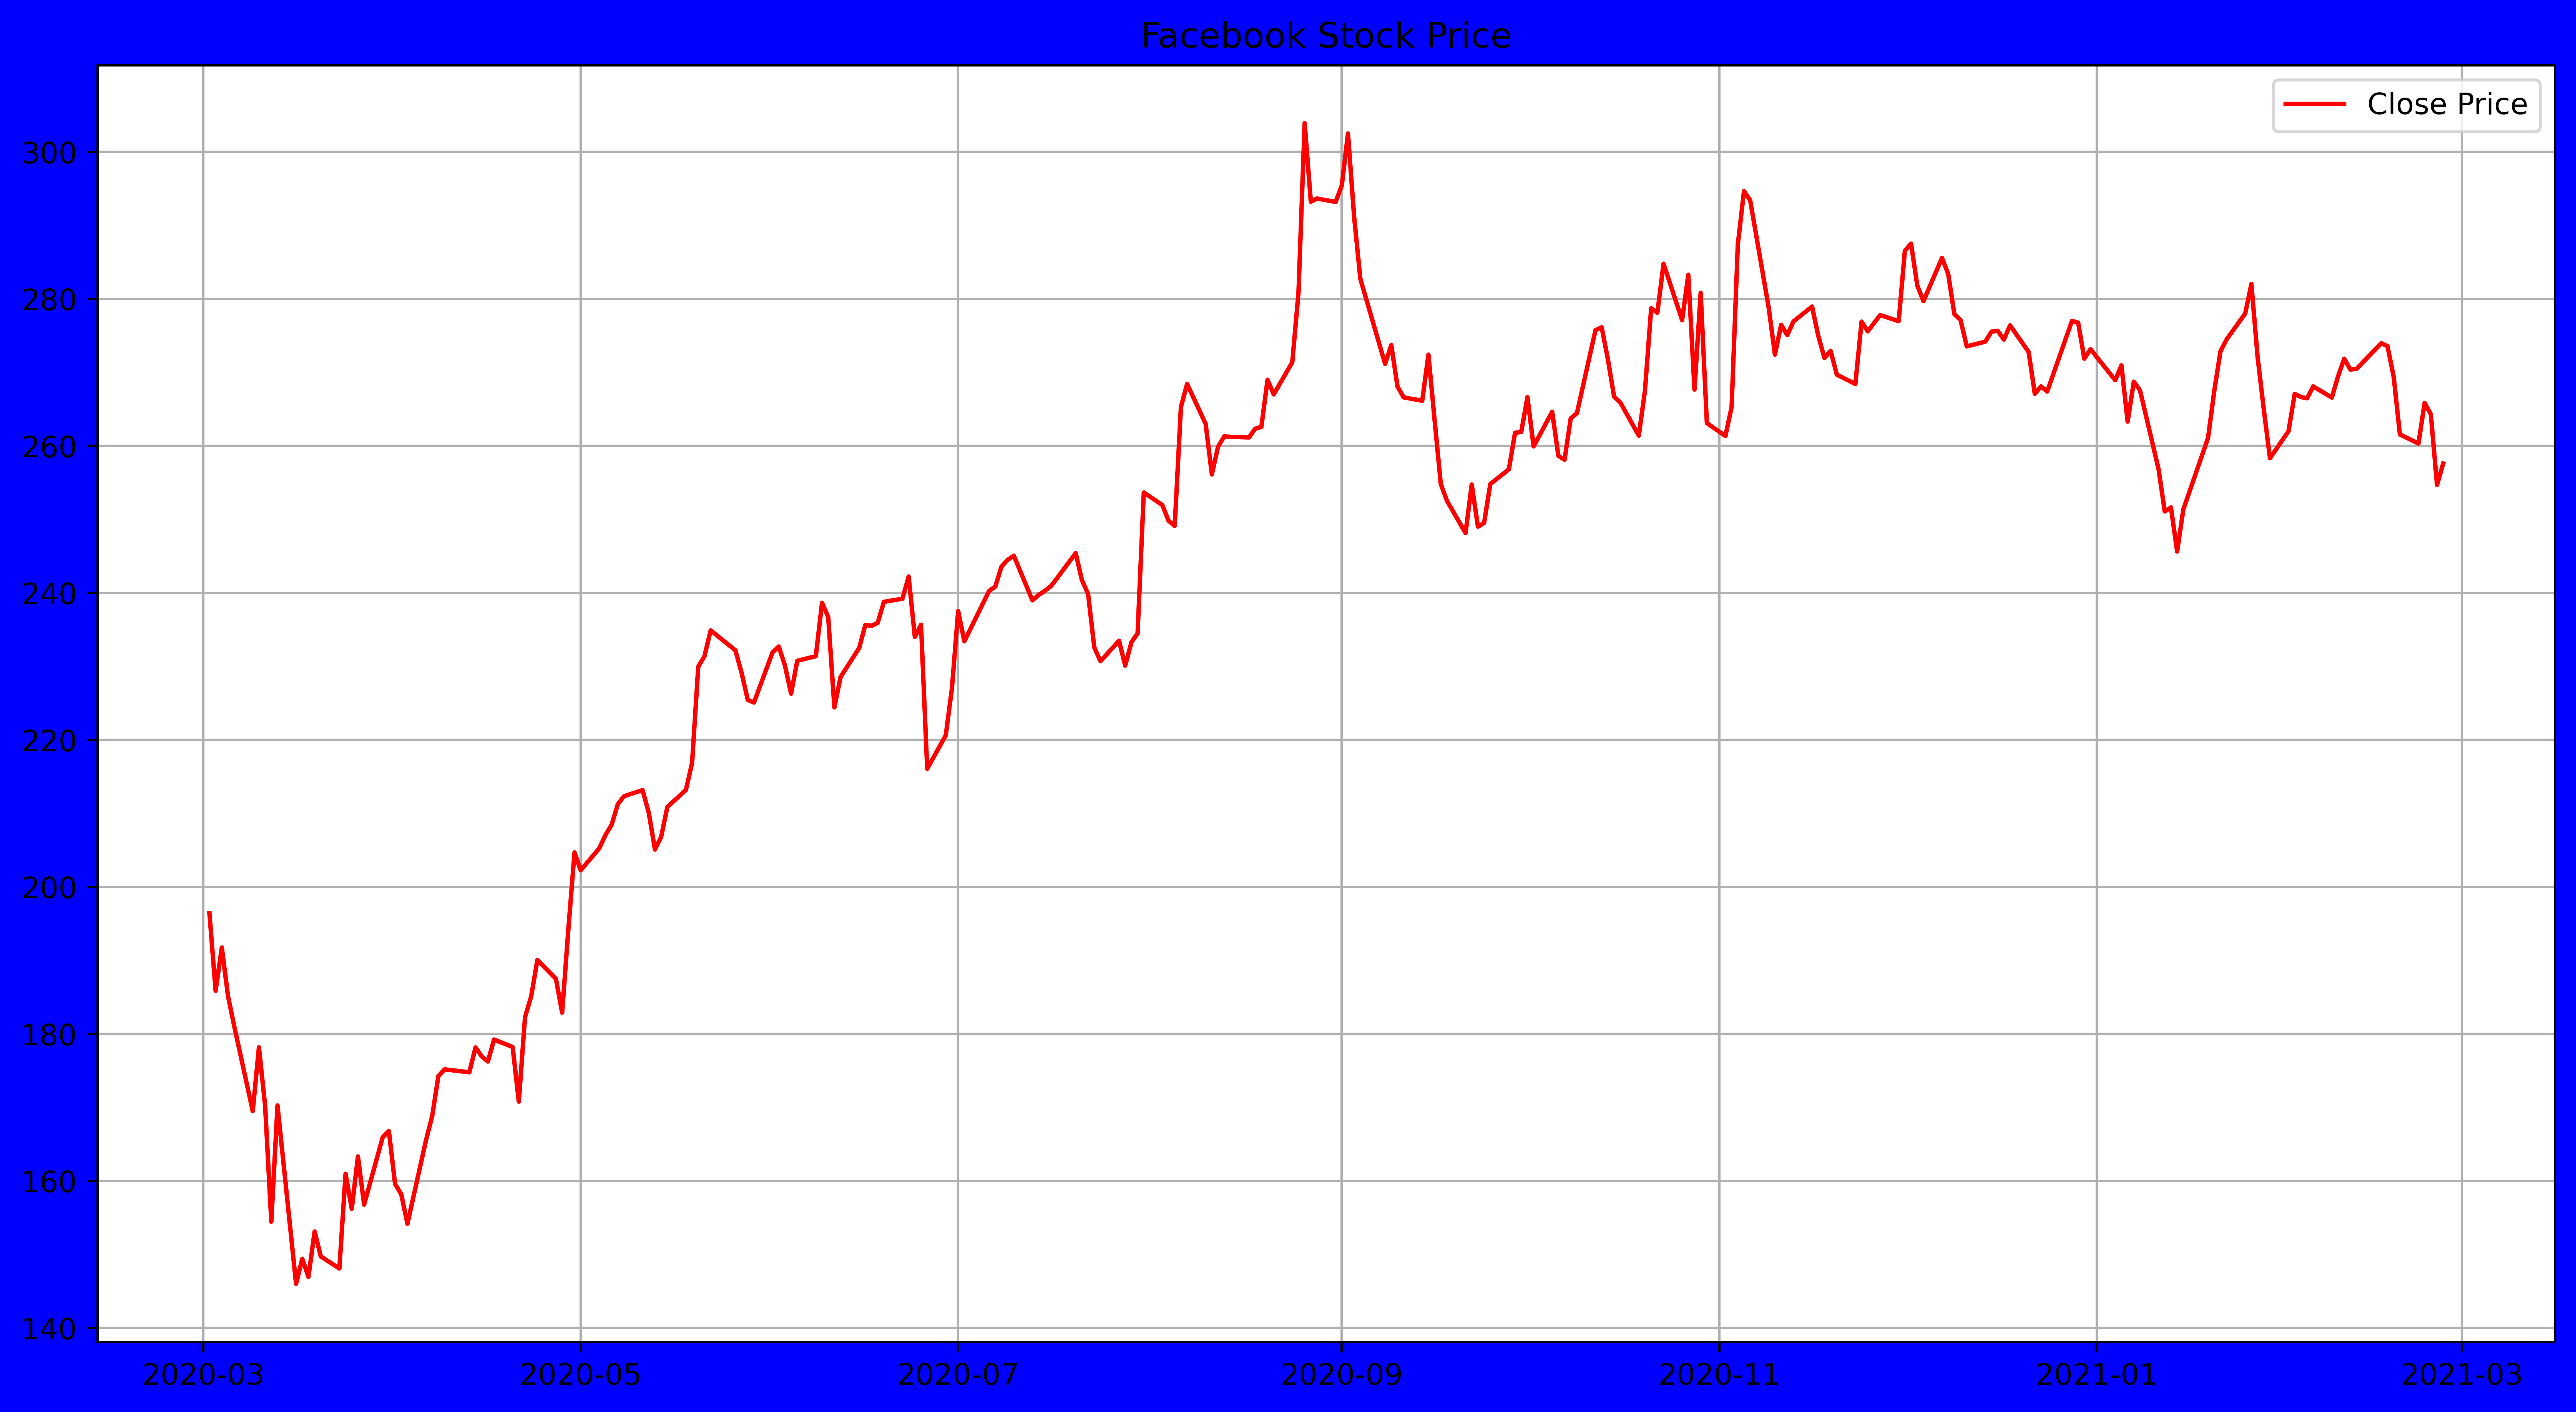

In [7]:
plt.figure(figsize=[15, 8], facecolor="b", dpi=550)
plt.grid(b=True)
plt.plot(fb.index, fb["Adj Close"], color="red")
plt.legend(["Close Price"])
plt.title("Facebook Stock Price")

In [8]:
fb[fb["Adj Close"] == fb["Adj Close"].max()][["Adj Close"]]

,Adj Close
Date,
2020-08-26,303.910004


In [9]:
fb[fb["Adj Close"] == fb["Adj Close"].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-16,152.320007,159.130005,143.100006,146.009995,146.009995,39120400


In [10]:
fb[fb["Adj Close"] == fb["Adj Close"].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-26,284.0,304.670013,284.0,303.910004,303.910004,69015200


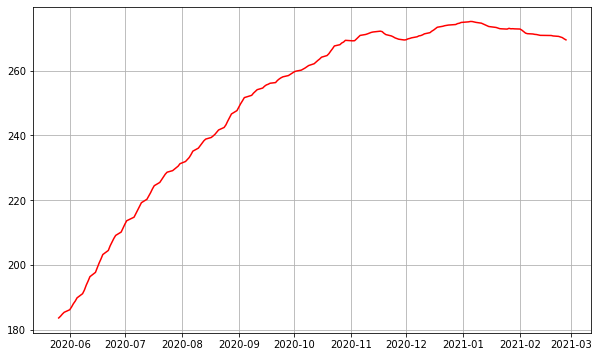

In [11]:
plt.figure(figsize=(10, 6))
plt.grid(b=True)
plt.plot(fb.index, fb["Adj Close"].rolling(window=60).mean(), color='red')

The return of the Facebook stock price

In [12]:
fb_return = (fb['Adj Close'] - fb['Adj Close'].shift(1)) / fb['Adj Close'].shift(1)

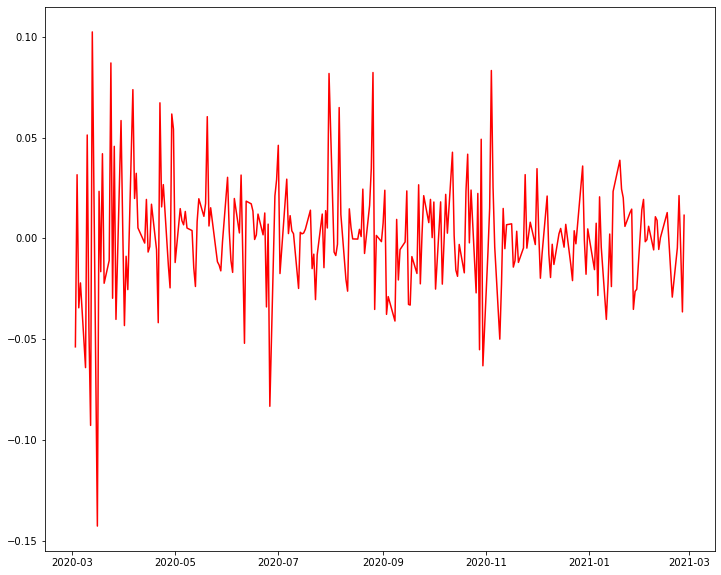

In [13]:
plt.figure(figsize=(12,10))
plt.plot(fb_return, color="red")

(array([ 1.,  0.,  2.,  7., 37., 94., 79., 18.,  7.,  5.]),
 array([-0.14252998, -0.11804198, -0.09355399, -0.069066  , -0.044578  ,
        -0.02009001,  0.00439798,  0.02888597,  0.05337397,  0.07786196,
         0.10234995]),
 <a list of 10 Patch objects>)

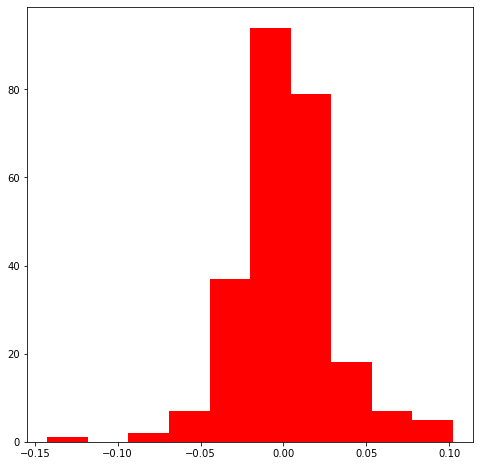

In [14]:
plt.figure(figsize=(8,8), facecolor="w")
plt.hist(fb_return, bins=10, color="red")

## Volatility 

###### 12 Months Annualized volatility

In [15]:
annual_vol = round(fb_return.std() * np.sqrt(251), 4)
print(f"Annualized volatility is {annual_vol*100} %")

Annualized volatility is 45.95 %


###### 6 Months Annualized volatility 

In [16]:
six = round(fb['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252), 4)
print(f"months annualized volatility is {six*100} %")

months annualized volatility is 54.92 %


In [17]:
VIX = yahoo_f.download("^VIX", start="2020-03-01", end="2021-03-01")
VIX.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,38.540001,40.410000,31.500000,33.419998,33.419998,0
2020-03-03,33.650002,41.060001,24.930000,36.820000,36.820000,0
2020-03-04,34.439999,35.580002,30.299999,31.990000,31.990000,0
2020-03-05,33.610001,42.840000,33.540001,39.619999,39.619999,0
2020-03-06,48.930000,54.389999,40.840000,41.939999,41.939999,0


The Market volatility

In [18]:
mk_vol = VIX["Adj Close"][-1]
mk_vol

27.950000762939453

## Monte Carlo Model

In [19]:
def simulation(S, K, time, rate, vol, _iter=1000, randomness=False):
    
    I = _iter
    dt = time / np.int(time * 360) 
    this = np.zeros((np.int(time * 360) + 1, I))
    this[0] = S
    if randomness is not True:
        np.random.seed(404)
        rn = np.random.standard_normal(this.shape)
    else: 
         rn = np.random.standard_normal(this.shape)
    for i in range(1, np.int(time * 360) + 1): 
        this[i] = this[i-1] * np.exp((rate - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[i])        
    var = np.transpose(this)
    put = np.mean(np.heaviside(K - var[:,-1],0))
    return round(put, 4)

## Black-Scholes

In [20]:
def BSModel(S, K, time, rate, vol):
    
    d1 = (np.log(S / K) + (rate + 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    d2 = (np.log(S / K) + (rate - 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    option_value = np.exp(-rate * time) * (1 - norm.cdf(d2) )
    return round(option_value, 4)

def theta(S, K, time, rate, vol):
    
    d1 = (np.log(S / K) + (rate + 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    d2 = (np.log(S / K) + (rate - 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))    
    ghet = np.exp(-rate*time)*norm.pdf(d2)*((d1/(2*time))-((rate)/(vol*np.sqrt(time)))) - (rate*np.exp(-rate*time)*(1 - norm.cdf(d2)))
    return np.round(ghet, 4)

def rho(S, K, time, rate, vol):
    
    d1 = (np.log(S / K) + (rate + 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    d2 = (np.log(S / K) + (rate - 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    oe = -time*np.exp(-rate*time)*(1 - norm.cdf(d2)) - (np.sqrt(time)/vol)*np.exp(-rate*time)*norm.pdf(d2)
    return np.round(oe, 4)

def delta(S, K, time, rate, vol):
    
    d2 = (np.log(S / K) + (rate - 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    return np.round(-(np.exp(-rate*time)* norm.pdf(d2))/(vol* S *np.sqrt(time)), 4)
        
def gamma(S, K, time, rate, vol):
    
    d1 = (np.log(S / K) + (rate + 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    d2 = (np.log(S / K) + (rate - 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    gamma = (np.exp(-rate*time) * d1 * norm.pdf(d2))/((vol**2) *(S**2)*(np.sqrt(time)))
    return np.round(gamma, 4)

def vega(S, K, time, rate, vol):
    
    d1 = (np.log(S / K) + (rate + 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))
    d2 = (np.log(S / K) + (rate - 0.5 * vol ** 2) * time) / (vol * np.sqrt(time))    
    return np.round((np.exp(-rate*time)*norm.pdf(d2))*(d1/vol), 4)

pricing option with models

In [21]:
### The adjsted close price of the third friday of july

fb.loc["2020-12-10"]["Adj Close"]

277.1199951171875

In [22]:
_price = fb.loc["2020-12-10"]["Adj Close"]
_strike = 270
_time = 30/360  ### days
sigma = annual_vol
_rate = .03

### Monte-Carlo Simulation

In [23]:
_ = simulation(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma, _iter=1000, randomness=True)
_

0.424

The binary put option price for Monte-Carlo Simulation is *0.452*

### Scholes-Merton Model

In [24]:
_bsm = BSModel(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma)
_bsm

0.4398

In [25]:
num = np.arange(1000, 11000, 500, )
_b = np.zeros_like(num, dtype=np.float64)
_m = np.zeros_like(num, dtype=np.float64)
for index, n in enumerate(num):
    _m[index] = simulation(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma, _iter=n, randomness=False)
    _b[index] = BSModel(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma)


In [26]:
_m

array([0.457 , 0.4647, 0.461 , 0.4384, 0.4567, 0.4543, 0.4505, 0.4484,
       0.454 , 0.4489, 0.4458, 0.4363, 0.442 , 0.4409, 0.4426, 0.4433,
       0.4442, 0.4411, 0.4366, 0.443 ])

In [27]:
_b

array([0.4398, 0.4398, 0.4398, 0.4398, 0.4398, 0.4398, 0.4398, 0.4398,
       0.4398, 0.4398, 0.4398, 0.4398, 0.4398, 0.4398, 0.4398, 0.4398,
       0.4398, 0.4398, 0.4398, 0.4398])

In [28]:
def rel_error(mc, bs):
    return (mc - bs)/bs
    

In [29]:
my_data = pd.DataFrame(data = {"MC":_m, "BS":_b})
my_data["Error"] = rel_error(my_data["MC"], my_data["BS"])
my_data.head(10)

,MC,BS,Error
0,0.4570,0.4398,0.039109
1,0.4647,0.4398,0.056617
2,0.4610,0.4398,0.048204
3,0.4384,0.4398,-0.003183
4,0.4567,0.4398,0.038427
5,0.4543,0.4398,0.032970
6,0.4505,0.4398,0.024329
7,0.4484,0.4398,0.019554
8,0.4540,0.4398,0.032287
9,0.4489,0.4398,0.020691


The graph below shows the comparison of Black Scholes model and Monte-Carlo simulation with different number of iteration

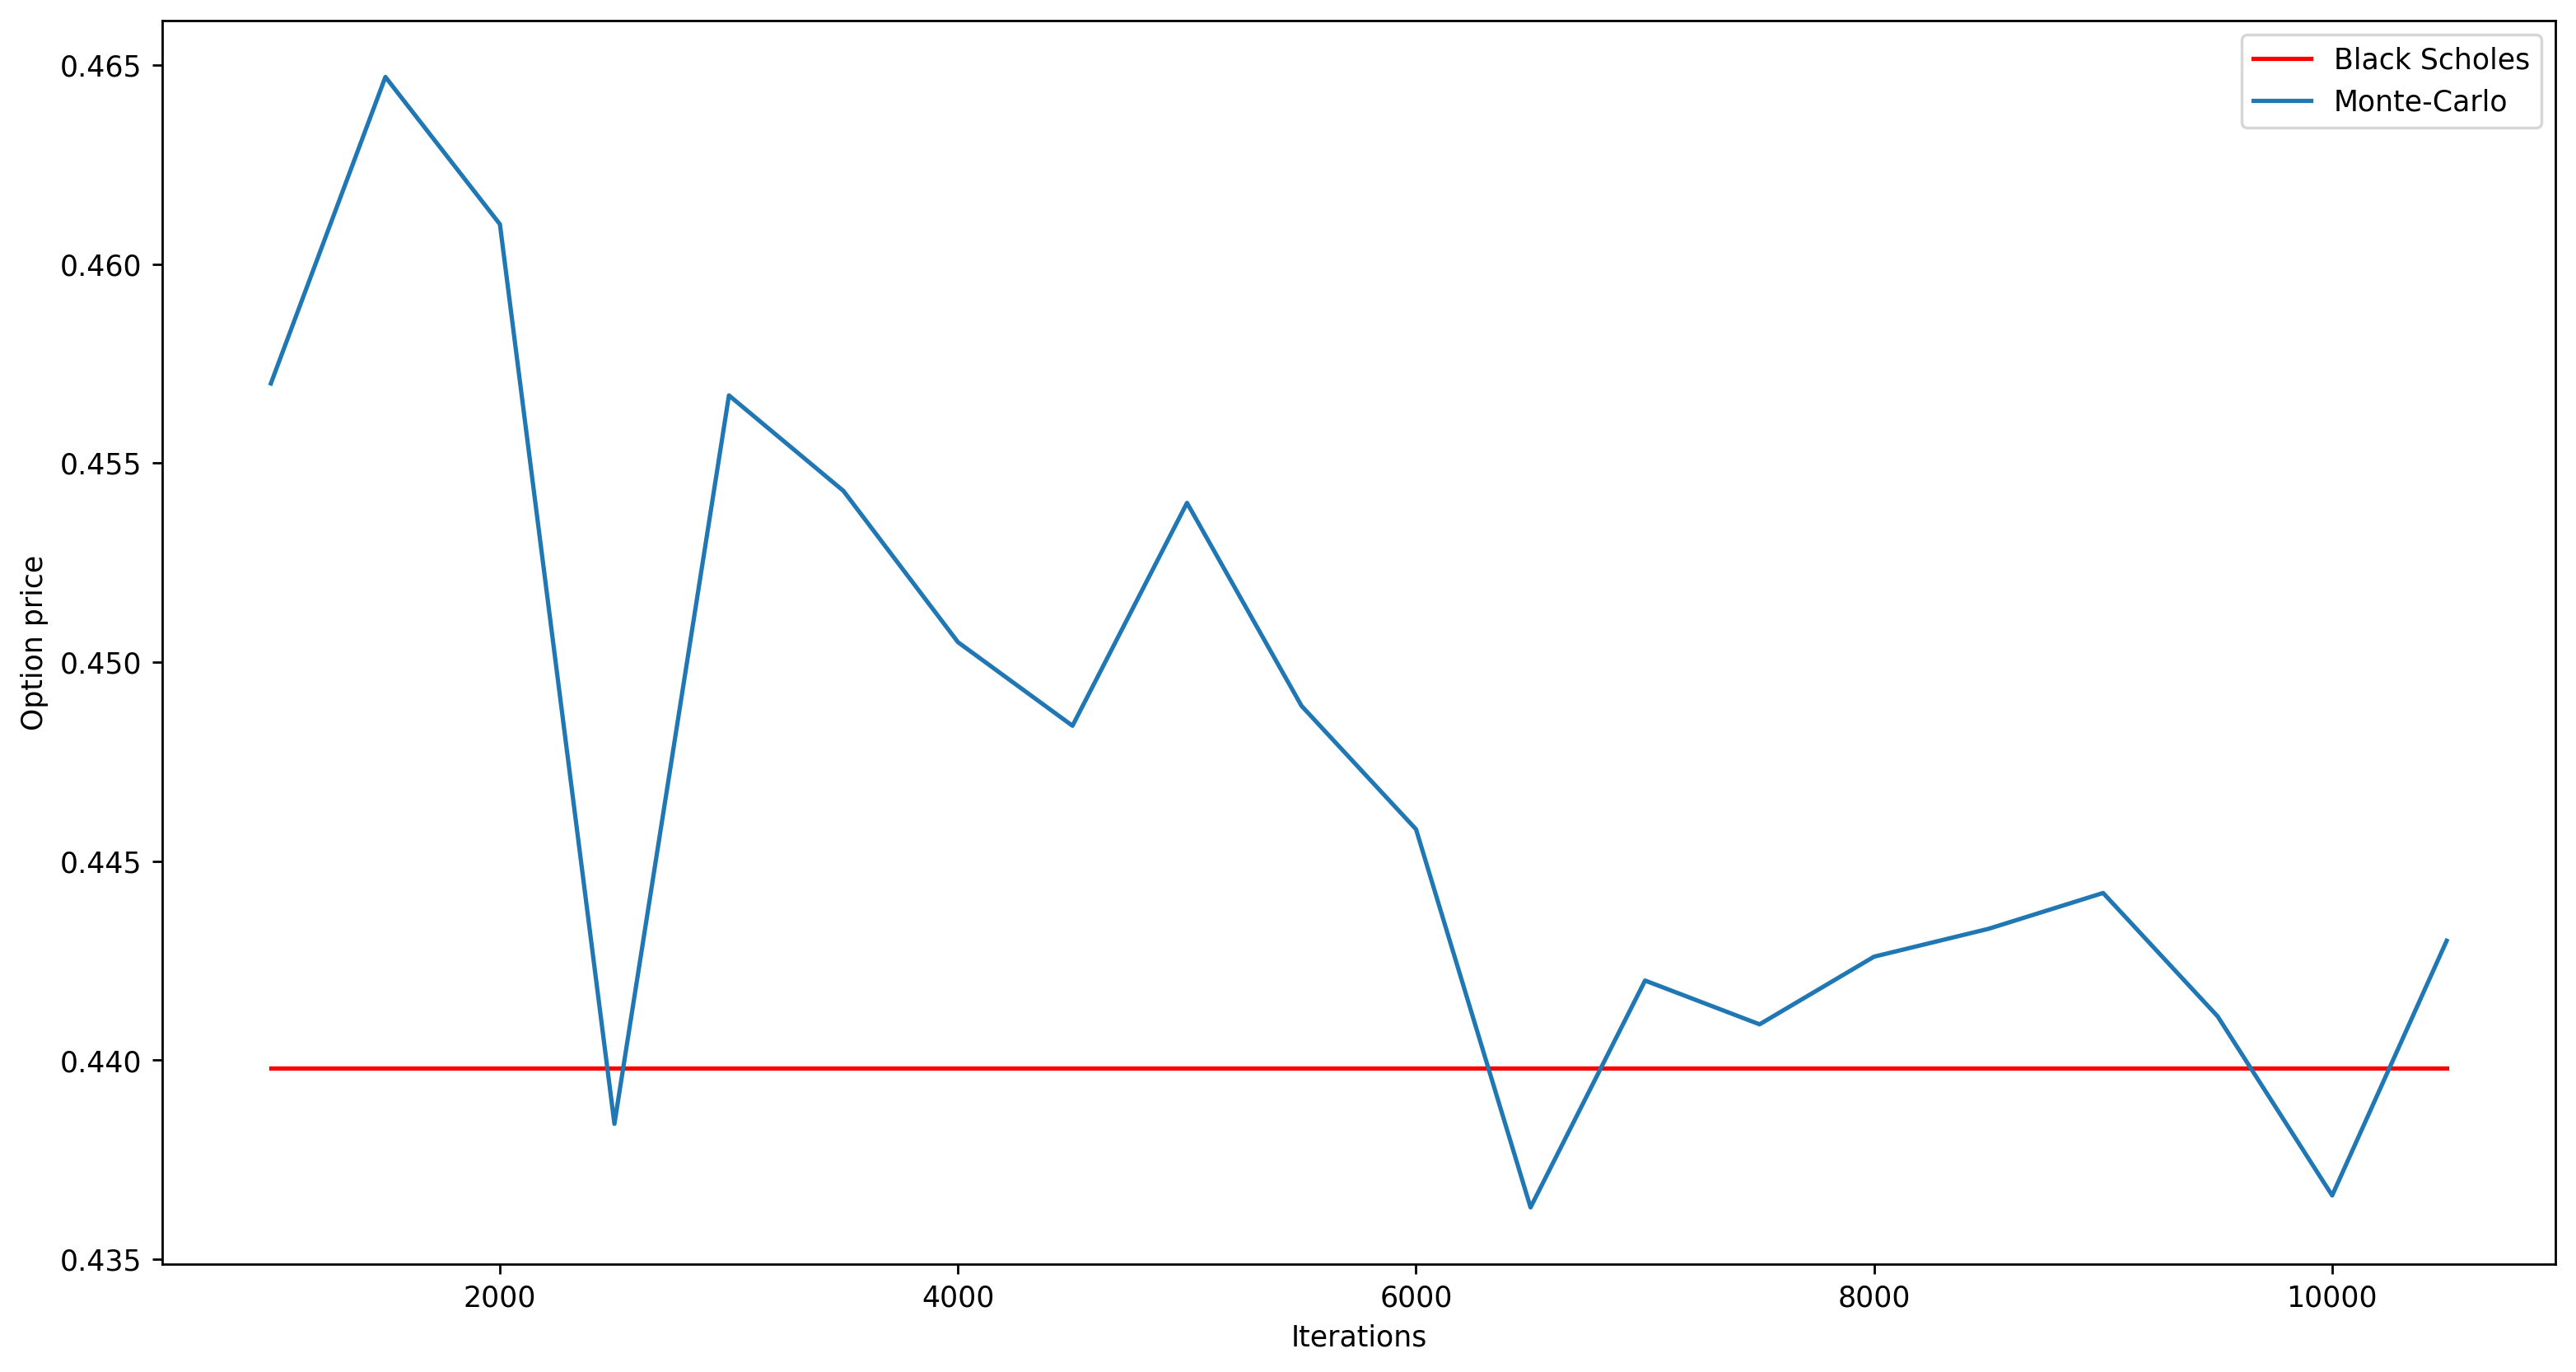

In [30]:
plt.figure(figsize=(15, 8), dpi=250)
plt.plot(num, my_data["BS"], color="red")
plt.plot(num, my_data["MC"])
plt.xlabel("Iterations")
plt.ylabel("Option price")
plt.title("")
plt.legend(["Black Scholes", "Monte-Carlo"])

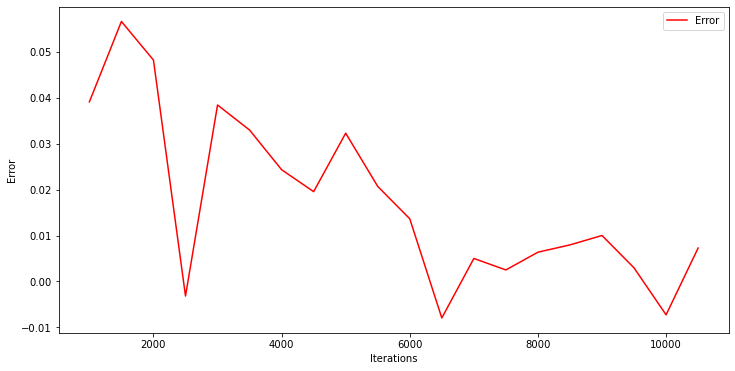

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(num, my_data["Error"], color="red")
plt.xlabel("Iterations")
plt.ylabel("Error")
#plt.title("")
plt.legend(["Error"])

## Greeks

#### Delta

In [32]:
delta(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma)

-0.0107

In [33]:
d = np.linspace(50,150,11)
delt = np.zeros_like(d)
for index, i in enumerate(d):
    delt[index] =  delta(S=i, K=100, time=1, rate=.04, vol=.3)    

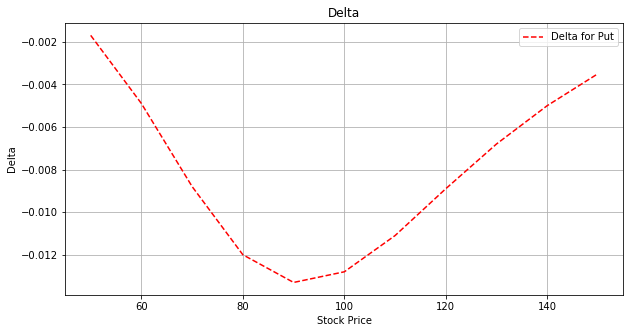

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(d, delt, '--', color="red")
plt.grid(b=True)
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

#### Vega

In [35]:
vega(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma)

0.241

In [36]:
v = np.linspace(0.1,0.4,13)
_v = np.zeros_like(v)
for index, i in enumerate(v):
    _v[index] = vega(S=100, K=100, time=1, rate=.05, vol=i)    

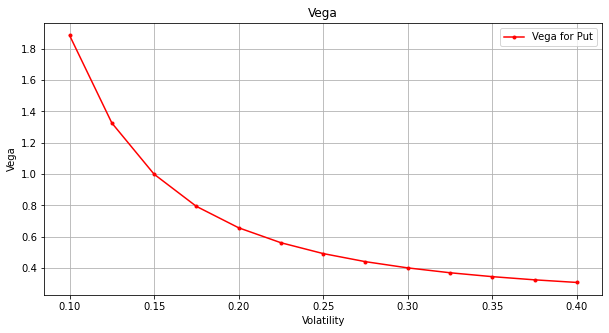

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(v, _v, '.-', color="red")
plt.grid(b=True)
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

#### Rho

In [38]:
rho(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma)

-0.2839

In [39]:
r = np.linspace(0.02, 0.07, 11)
ro = np.zeros_like(r)
for index ,i in enumerate(r):
    ro[index] = rho(S=110, K=110, time=1, rate=i, vol=.3)    

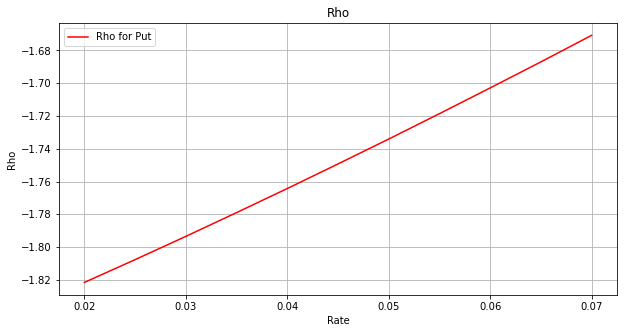

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(r, ro, '-', color="red")
plt.grid(b=True)
plt.xlabel('Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

#### Gamma

In [41]:
gamma(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma)

0.0

In [42]:
g = np.linspace(80,160,11)
gama = np.zeros_like(g)
for index ,i in enumerate(g):
    gama[index] = gamma(S=i, K=100, time=1, rate=.05, vol=.3)    

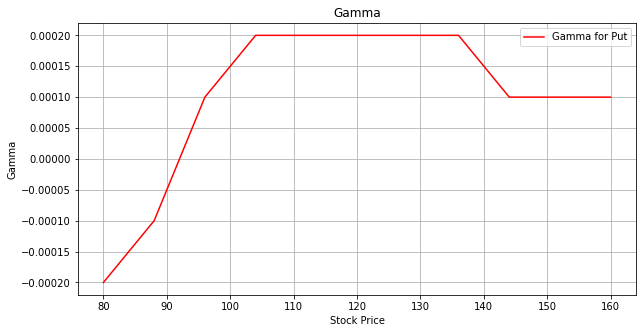

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(g, gama, '-', color="red")
plt.grid(b=True)
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

#### Theta

In [44]:
theta(S=_price, K=_strike, time=_time, rate=_rate, vol=sigma)

0.5623

In [45]:
Th = np.linspace(0.2, 1, 12)
_Th = np.zeros_like(Th)
for index, i in enumerate(Th):
    _Th[index] = theta(S=100, K=100, time=i, rate=.05, vol=sigma)

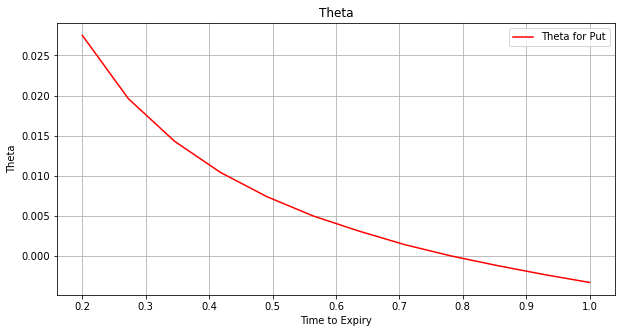

In [46]:
plt.figure(figsize=(10, 5))
plt.grid(b=True)
plt.plot(Th, _Th, '-', color="red")
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [47]:
stock = np.linspace(50,150, 100)
time = 90.0/365

_BS = np.zeros((100,))
_MC = np.zeros((100,))

for i, S in enumerate(stock):
    _BS[i] = BSModel(S=S, K=100, time=time, rate=.05, vol=.3)
    _MC[i] = simulation(S=S, K=100, time=time, rate=.05, vol=.3, _iter=5000, randomness=False)

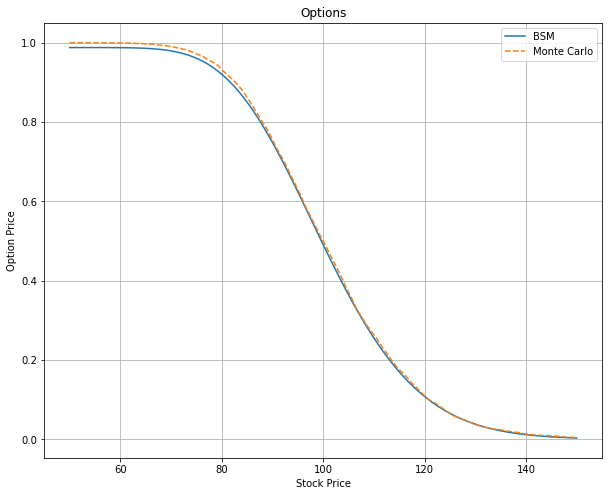

In [48]:
fig = plt.figure(figsize=[10, 8])

plt.grid(b=True)
plt.plot(stock, _BS, '-')
plt.plot(stock, _MC, '--')


plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Options')
plt.legend(['BSM', "Monte Carlo"])

In [49]:
time = np.linspace(.1, 1, 100)

_BSt = np.zeros((100,))
_MCt = np.zeros((100,))

for i, t in enumerate(time):
    _BSt[i] = BSModel(S=100, K=100, time=t, rate=.05, vol=.3)
    _MCt[i] = simulation(S=100, K=100, time=t, rate=.05, vol=.3, _iter=5000, randomness=False)

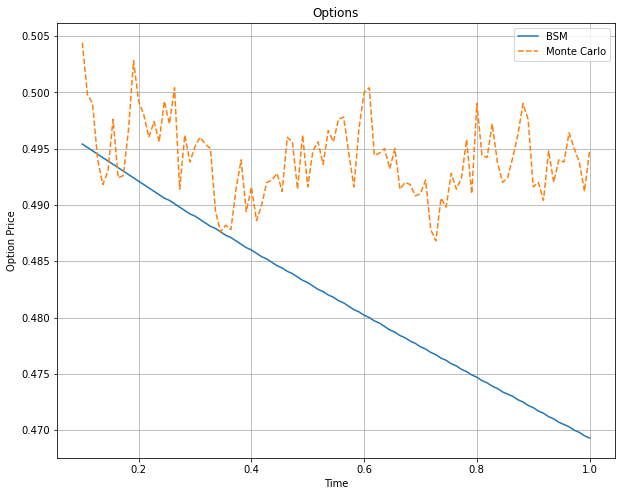

In [50]:
fig = plt.figure(figsize=[10, 8])

plt.grid(b=True)
plt.plot(time, _BSt, '-')
plt.plot(time, _MCt, '--')


plt.xlabel('Time')
plt.ylabel('Option Price')
plt.title('Options')
plt.legend(['BSM', "Monte Carlo"])